# I. Import Dataset

## 1.1 Upload and Overview

In [11]:
import pandas as pd

# Load the first few lines of each file to inspect their structure
file_paths = [
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok1.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok2.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok3.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok4.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments_tiktok5.csv",
    r"D:\GitHub\UEL-Course\Social Media Analytics\Data\comments.csv"
]

# Inspect the first few lines of each file
file_previews = {path: pd.read_csv(path, nrows=5) for path in file_paths}
file_previews_keys = list(file_previews.keys())
file_previews[file_previews_keys[0]], file_previews[file_previews_keys[1]], file_previews[file_previews_keys[2]], file_previews[file_previews_keys[3]], file_previews[file_previews_keys[4]], file_previews[file_previews_keys[5]]


(                                             Comment  \
 0                                             quá đã   
 1  Thôi anhoi111111111111111111111111111111111111...   
 2                        Nhà xe nào bị thanh tra vậy   
 3                                       Đi tàu nhé 😅   
 4                                ui tin real hả mn😳😳   
 
                                                 Link  
 0  https://www.tiktok.com/@lipovitan.vn/video/731...  
 1  https://www.tiktok.com/@lipovitan.vn/video/731...  
 2  https://www.tiktok.com/@lipovitan.vn/video/731...  
 3  https://www.tiktok.com/@lipovitan.vn/video/731...  
 4  https://www.tiktok.com/@lipovitan.vn/video/731...  ,
                                              Comment  \
 0                                   Ko có đà nẵng :<   
 1                                  Bẻ lái khét quá 😂   
 2                          Ước được đi phi cơ riêng🤡   
 3                  redbull chiếm trọn trái tim bạn ❤   
 4  Về Việt Nam k biết có thay đổi

In [12]:
# Combine all files into one DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in file_paths])

# Save the combined DataFrame to a new CSV file
combined_csv_path = r"D:\GitHub\UEL-Course\Social Media Analytics\Data\combined_comments.csv"
combined_df.to_csv(combined_csv_path, index=False)

combined_csv_path


'D:\\GitHub\\UEL-Course\\Social Media Analytics\\Data\\combined_comments.csv'

In [13]:
df_org = pd.read_csv(r'D:\GitHub\UEL-Course\Social Media Analytics\Data\combined_comments.csv', )
df = df_org.copy()
df.head()

,Comment,Link
0,quá đã,https://www.tiktok.com/@lipovitan.vn/video/731...
1,Thôi anhoi111111111111111111111111111111111111...,https://www.tiktok.com/@lipovitan.vn/video/731...
2,Nhà xe nào bị thanh tra vậy,https://www.tiktok.com/@lipovitan.vn/video/731...
3,Đi tàu nhé 😅,https://www.tiktok.com/@lipovitan.vn/video/731...
4,ui tin real hả mn😳😳,https://www.tiktok.com/@lipovitan.vn/video/731...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  2544 non-null   object
 1   Link     2575 non-null   object
dtypes: object(2)
memory usage: 40.4+ KB


In [15]:
df.describe()

,Comment,Link
count,2544,2575
unique,1927,106
top,Thanh Lê,https://www.tiktok.com/@lipovitan.vn/video/709...
freq,18,296


## 1.2 Dealing with null and duplicated row

In [16]:
# Check for null values and duplicated rows
null_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()

null_values, duplicated_rows


(Comment    31
 Link        0
 dtype: int64,
 366)

In [17]:
# Remove duplicated rows
df = df.drop_duplicates()

# Check the shape of the dataframe after removing duplicates
shape_after_deduplication = df.shape

shape_after_deduplication


(2209, 2)

In [18]:
# Check for null values and duplicated rows
null_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()

null_values, duplicated_rows


(Comment    2
 Link       0
 dtype: int64,
 0)

In [19]:
# Remove rows with null values in the 'Comment' column
df = df.dropna(subset=['Comment'])

# Check the shape of the dataframe after removing null values
shape_after_null_removal = df.shape

shape_after_null_removal


(2207, 2)

# II. EDA

## 2.1 Comment Length Analysis

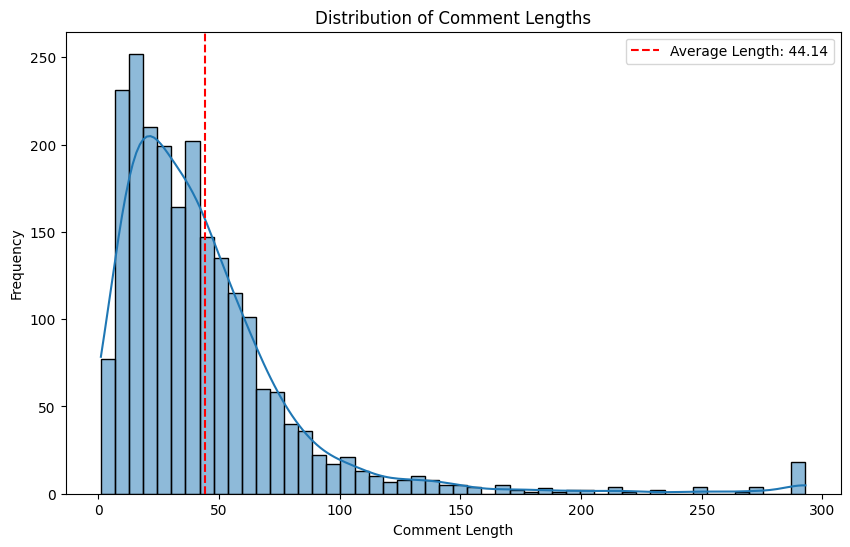

In [21]:
# Calculate the length of each comment
df['Comment_Length'] = df['Comment'].apply(len)

# Calculate the average length of comments
average_comment_length = df['Comment_Length'].mean()

# Plot the distribution of comment lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Comment_Length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.axvline(average_comment_length, color='r', linestyle='--', label=f'Average Length: {average_comment_length:.2f}')
plt.legend()
plt.show()


In [26]:
# Calculate Q1, Q3, and IQR
Q1 = df['Comment_Length'].quantile(0.25)
Q3 = df['Comment_Length'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
outlier_threshold = Q3 + 1.5 * IQR

# Filter the dataframe to find the outliers
long_comments = df[df['Comment_Length'] > outlier_threshold]

# Display the outliers
long_comments[['Comment', 'Comment_Length']].sort_values(by='Comment_Length', ascending=False)

print( long_comments['Comment'])


1       Thôi anhoi111111111111111111111111111111111111...
70      Hồi đó nhớ đi chung xe với mẹ nằm 1 cái dường ...
95      ngày trước bán vé xe thág tết mệt lã người luô...
105     đi xe thà đi tàu mình hcm về thanh hóa 12 năm ...
203     Lúc nhỏ thì em rất thích Tết nhưng bây giờ em ...
                              ...                        
2533    Author\nNước Tăng Lực Lipovitan\nAnh Tran Bạn ...
2541    Author\nNước Tăng Lực Lipovitan\nCổ Quốc Tuấn ...
2543    Nước Tăng Lực Lipovitan\nTuấn Trường Bạn tham ...
2559    Author\nNước Tăng Lực Lipovitan\nThanh Huy Cha...
2566    Author\nNước Tăng Lực Lipovitan\nThao Thu Hihi...
Name: Comment, Length: 104, dtype: object


- **Need more knowledge about NLP in VietNam**

## 2.2 Sentiment Analysis

In [28]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df['Polarity'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = pd.cut(df['Polarity'], bins=3, labels=["Negative", "Neutral", "Positive"])

In [32]:
df

,Comment,Link,Comment_Length,Polarity,Sentiment
0,quá đã,https://www.tiktok.com/@lipovitan.vn/video/731...,6,0.00,Neutral
1,Thôi anhoi111111111111111111111111111111111111...,https://www.tiktok.com/@lipovitan.vn/video/731...,149,0.00,Neutral
2,Nhà xe nào bị thanh tra vậy,https://www.tiktok.com/@lipovitan.vn/video/731...,27,0.00,Neutral
3,Đi tàu nhé 😅,https://www.tiktok.com/@lipovitan.vn/video/731...,12,0.00,Neutral
4,ui tin real hả mn😳😳,https://www.tiktok.com/@lipovitan.vn/video/731...,19,0.20,Neutral
...,...,...,...,...,...
2568,Minh Thiên\nChỉ vĩnh phúc mới có mà thôi,https://www.facebook.com/Lipovitan.vn/posts/pf...,39,0.00,Neutral
2569,Author\nNước Tăng Lực Lipovitan\nMinh Thiên Mo...,https://www.facebook.com/Lipovitan.vn/posts/pf...,94,0.00,Neutral
2570,Ng Vương Gia Long\nlike hộ tus acc mới up nha b,https://www.facebook.com/Lipovitan.vn/posts/pf...,46,-0.05,Neutral
2571,Ng Vương Gia Long\nlike cho glong tus acc mới ...,https://www.facebook.com/Lipovitan.vn/posts/pf...,63,-0.05,Neutral


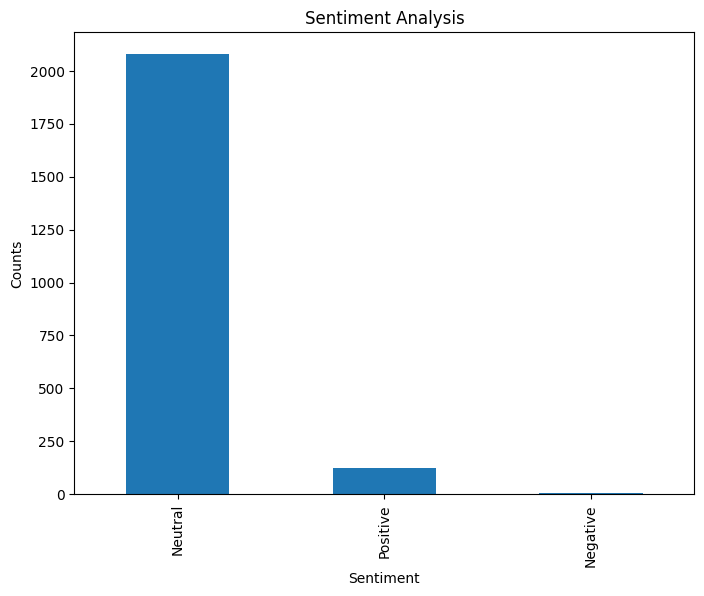

In [30]:

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()


- Find out that NOT WORKING WELL with comment from VietNam so we can try another method

In [35]:
pip install underthesea


  Using cached underthesea-6.8.0-py3-none-any.whl.metadata (14 kB)
  Using cached python_crfsuite-0.9.10-cp312-cp312-win_amd64.whl.metadata (4.3 kB)
  Using cached underthesea_core-1.0.4.tar.gz (560 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site

In [31]:
import pandas as pd
from underthesea import sentiment

# Sử dụng underthesea để phân tích cảm xúc
df['Sentiment'] = df['Comment'].apply(sentiment)

df


     ---------------------------------------- 0.0/560.4 kB ? eta -:--:--
      --------------------------------------- 10.2/560.4 kB ? eta -:--:--
     -- ---------------------------------- 30.7/560.4 kB 330.3 kB/s eta 0:00:02
     ---- -------------------------------- 61.4/560.4 kB 469.7 kB/s eta 0:00:02
     --------- -------------------------- 143.4/560.4 kB 853.3 kB/s eta 0:00:01
     ----------------- -------------------- 256.0/560.4 kB 1.1 MB/s eta 0:00:01
     ---------------------- --------------- 337.9/560.4 kB 1.3 MB/s eta 0:00:01
     ----------------------------- -------- 430.1/560.4 kB 1.4 MB/s eta 0:00:01
     ------------------------------------ - 532.5/560.4 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 560.4/560.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'don

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "C:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site